# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

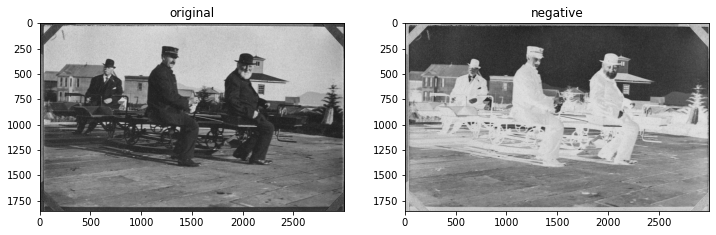

In [3]:
'''
1
Negative Transformation
'''
def Negative(img):
    return (1 - np.copy(img))

img = rgb2gray(io.imread('1.jpg'))
show_images([img,Negative(img)],["original","negative"])


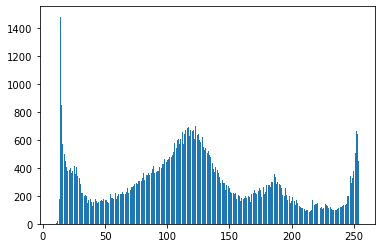

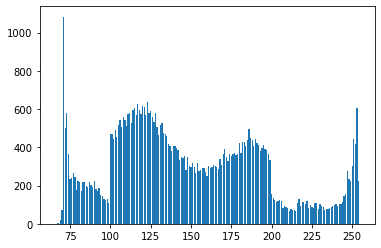

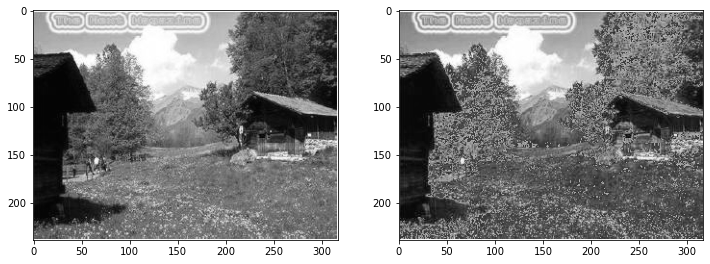

In [13]:
'''
2
Contrast Enhancement
'''

img = np.array(rgb2gray(io.imread('2.jpg')))
showHist(img*255)

# y = (1.5x + 50/255)
def contrast_enhancement(img):
    img_np = np.copy(img)
    img_np[(img_np <= 100/255)] = 1.5*img_np[(img_np <= 100/255)]+50/255
    return img_np

contrast_img = contrast_enhancement(img)
showHist(contrast_img*255)
show_images([img,contrast_img],["",""])

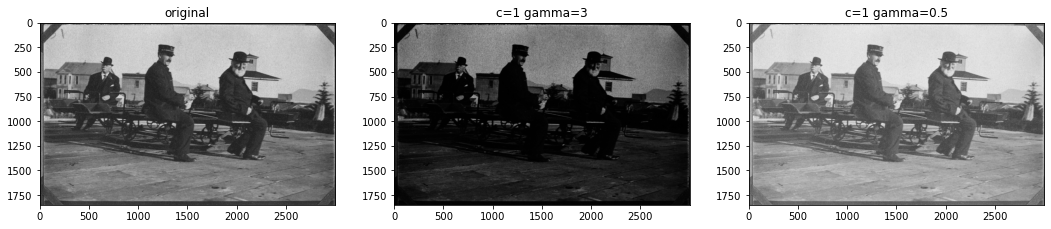

In [5]:
'''
3
Gamma Correction
'''
def gamma_correction(img, c, gamma):
    return (c * (np.copy(img)**gamma))

img = rgb2gray(io.imread('1.jpg'))
show_images(
    [img,gamma_correction(img,1,3),gamma_correction(img,1,0.5)],
    ["original","c=1 gamma=3", "c=1 gamma=0.5"]
)



(array([   2,   38,    0,  389, 1245,    0, 1518,    0, 3628, 3146, 2041,
          0, 1601, 2415,    0, 1684,    0, 1506,    0, 1813, 1660, 1390,
          0, 1572, 2662, 1761,    0, 1387, 1218, 1287,    0, 1308, 1288,
       1068,  732,  639,  559,    0,  575,  504,  502,    0,  518,  476,
          0,  490,  599, 1263,  686,  708,    0,  724,  804,  957, 2770,
          0, 1200,  973, 1004, 2434, 1087,    0,  892, 1737,  995,  813,
          0,    0, 1459,  723,  576,  512,  448,  431,  377,  600,  296,
        266,    0,  354,  154,  121,  113,  113,   91,  163,   58,   53,
         50,   51,   67,    0,   20,   21,    0,   36,   10,   12,   24,
          0,   13,   30,    6,   13,   11,   11,    9,    9,    9,    0,
         19,   13,   16,    6,    0,   18,    6,    0,    5,    7,    6,
          6,    8,   11,    0,    9,    9,    3,    8,    0,    9,    7,
          9,    7,    4,    5,   17,    4,    6,    4,   11,    7,    0,
          0,    2,    6,    2,    8,    0,    2,  

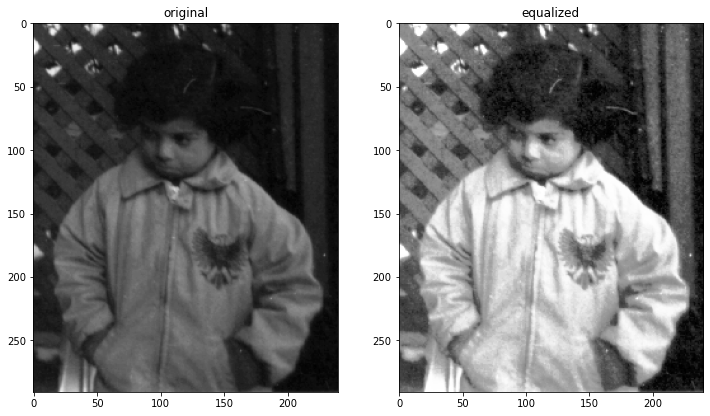

(array([ 477, 1871, 2053, 1848, 1198, 1072, 1062, 1052, 1086, 1122, 1322,
       1513, 1498, 1320, 1098, 1026,  848,  725,  574,  449,  400,  380,
        314,  290,  315,  323,  273,  260,  262,  257,  263,  229,  232,
        221,  223,  222,  216,  183,  187,  210,  185,  186,  185,  143,
        134,  154,  162,  163,  131,  143,  143,  147,  145,  140,  173,
        146,  124,  154,  149,  171,  133,  168,  153,  154,  151,  168,
        151,  174,  179,  178,  188,  182,  191,  175,  166,  147,  171,
        172,  141,  150,  135,  167,  138,  131,  125,  119,  135,  105,
        127,  117,  117,   98,  103,  106,  126,  118,  120,  127,  113,
        113,  108,  128,  115,  119,  121,  125,  107,  124,  129,  115,
        113,  106,  106,   86,  111,   96,  109,  105,  104,  114,   96,
         99,   91,  116,  100,   97,  117,  105,  107,  108,  118,  100,
        112,   99,  108,  106,  102,  116,  107,  100,   90,  110,  108,
         84,   87,   93,   92,  105,   94,  102,  

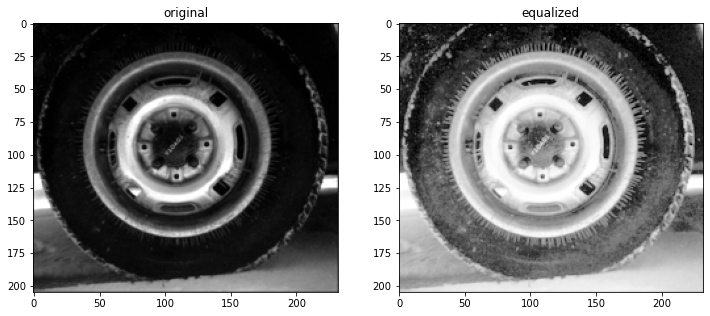

In [15]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def histogram_equalization(image, G, normalized=True):
    image_cal = np.array(np.copy(image)*255,dtype=np.uint8) if normalized else np.copy(image)

    image_hist = histogram(image_cal)
    print(image_hist)
    H = np.zeros(G)
    H[image_hist[1][0] : image_hist[1][len(image_hist[1]) - 1] + 1] = image_hist[0]
    
    H_c = np.cumsum(H)
    
    Q = np.ceil((G - 1) * H_c / (image_cal.shape[0] * image_cal.shape[1]))
    
    image_new = Q[image_cal.flatten()]
    image_new = np.reshape(image_new, image_cal.shape)

    return image_new

img = io.imread('imgs/pout.tif', as_gray=True)
show_images([img, histogram_equalization(img, 256, False)], ["original", "equalized"])


img2 = io.imread('imgs/tire.tif', as_gray=True)
show_images([img2, histogram_equalization(img2, 256, False)], ["original", "equalized"])



In [8]:
x = np.array([
    [0, 122, 124],
    [67, 89, 46],
    [156, 198, 198]
])

y = histogram(x, 256)
#print(y)

unique, counts = np.unique(x, return_counts=True)
#print(dict(zip(unique, counts)))

[[107 108 107 ...  84  83  83]
 [109 106 108 ...  84  84  86]
 [107 106 110 ...  84  83  83]
 ...
 [ 97  99 101 ...  82  82  83]
 [ 99  98  98 ...  84  84  86]
 [101  99  99 ...  97  97  97]]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   1.  33.   0. 135. 226.   0. 255.   0. 287. 277.
 239.   0. 231. 251.   0. 255.   0. 274.   0. 282. 283. 282.   0. 282.
 272. 265.   0. 269. 264. 262.   0. 270. 267. 258. 232. 222. 213.   0.
 201. 203. 195.   0. 202. 180.   0. 179. 194. 220. 190. 197.   0. 194.
 201. 196. 222.   0. 201. 188. 195. 212. 193.   0. 186. 200. 188. 180.
   0.   0. 200. 177. 170. 161. 151. 152. 152. 161. 120. 101.   0. 104.
  62.  57.  61.  53.  45.  

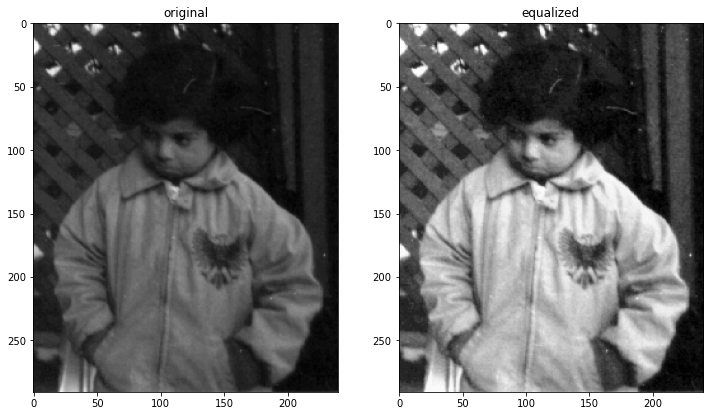

In [9]:
def equalizer(img, nbins=256):
    image = np.copy(img)
    
    # build histogram
    histog = np.zeros(nbins)
    for pixel in image:
        histog[pixel] = histog[pixel] + 1
    #showHist(histog)
    #io.show()
    print(histog)

    
    histog_cum = np.copy(histog)
    for i in range(1,len(histog_cum)):
        histog_cum[i] = histog_cum[i] + histog_cum[i - 1]
     
    q = np.ceil((nbins - 1) * histog_cum / (image.shape[0] * image.shape[1]))
    
    image_new = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_new[i][j] = q[image[i][j]]
    return image_new


img = io.imread('imgs/pout.tif')
print(img)
img_new = equalizer(img, 256)
show_images([img, img_new], ["original", "equalized"])



True
True


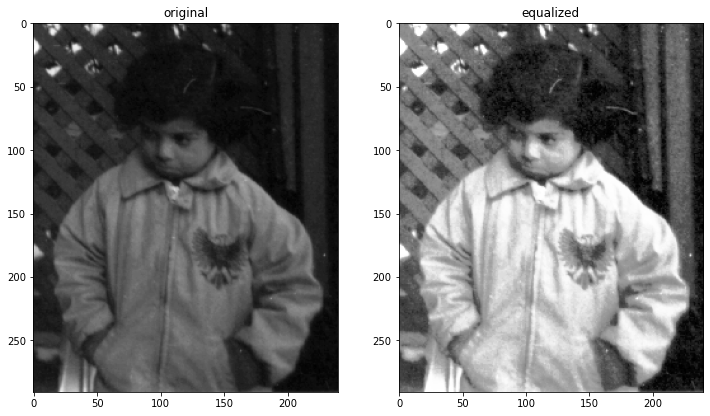

In [10]:

Q_new = 0
H_new = 0
def histogram_equalization(image, G, normalized=True):
    image_cal = np.array(np.copy(image)*255,dtype=np.uint8) if normalized else np.copy(image)

    image_hist = histogram(image_cal)
    H = np.zeros(G)
    H[image_hist[1][0] : image_hist[1][len(image_hist[1]) - 1] + 1] = image_hist[0]
    #print(H)

    h = np.zeros(256)
    for x in range(image.shape[0]):        
        for y in range(image.shape[1]):            
            i = image_cal[x,y]   
            h[i] +=1
    
    print((H==h).all())
    global H_new
    H_new = np.copy(H)

    #showHist(H)
    #io.show()
    H_c = np.cumsum(H)
    
    Q = np.ceil((G - 1) * H_c / (image_cal.shape[0] * image_cal.shape[1]))
    global Q_new
    Q_new = np.copy(Q)
    #image_new = Q[image_cal.flatten()]
    #image_new = np.reshape(image_new, image_cal.shape)
    image_new = np.zeros(image_cal.shape)
    for x in range(image.shape[0]):        
        for y in range(image.shape[1]):            
            image_new[x,y]= Q[image_cal[x,y]]
            

    return image_new

img = io.imread('imgs/pout.tif')

test_image = histogram_equalization(img, 256, False)
show_images([img, histogram_equalization(img, 256, False)], ["original", "equalized"])


#img2 = io.imread('imgs/tire.tif', as_gray=True)
#show_images([img2, histogram_equalization(img2, 256, False)], ["original", "equalized"])



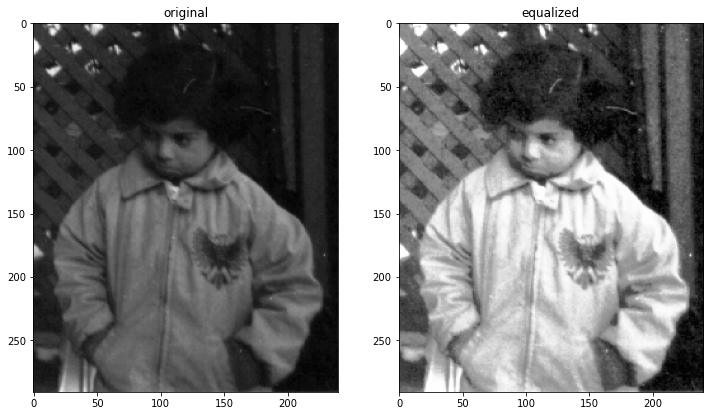

In [11]:
from skimage.exposure import equalize_hist

img = io.imread('imgs/pout.tif')
show_images([img, equalize_hist(img)], ["original", "equalized"])

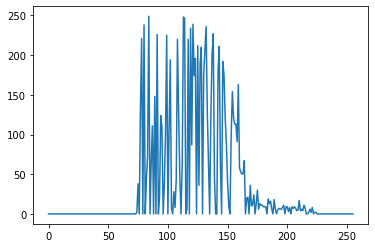

False


NameError: name 'new_img' is not defined

In [12]:
img= io.imread('./imgs/pout.tif')
def getImageWithHist(img,ext=0,nbins=256):
    img2 = np.copy(img)
    h=np.zeros(256,dtype=np.uint8)
    #draw the histogram
#     img = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
#     img = img.astype(np.uint8)
    for x in range(img2.shape[0]):        
        for y in range(img2.shape[1]):            
            i = img2[x,y]   
            h[i] +=1
    plt.plot(h)
    plt.show()
    h_c= np.zeros(256) #compulative sum
    t=np.zeros(256) #mapping function
#     for idx,value in enumerate(h):
#         h_c[idx]=h_c[idx-1]+value
#         t[idx] = round((255*h_c[idx])/(img.shape[0]*img.shape[1]))
    h_c=np.cumsum(h)
    t = np.ceil((255*h_c)/(img2.shape[0]*img2.shape[1]))
    global H_new
    print((H_new == h).all())
    #global Q_new
    #print(Q_new)
    #print((t == Q_new).all())

    #Q = np.ceil((256 - 1) * h_c / (img2.shape[0] * img2.shape[1]))
    #print((t == Q).all())
    
    #new_img = np.zeros(img2.shape,dtype=np.uint8)
    #for x in range(img2.shape[0]):        
    #    for y in range(img2.shape[1]):            
    #        new_img[x,y]= Q[img2[x,y]]
    image_new = np.zeros(img2.shape)
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            image_new[i][j] = t[img2[i][j]]
    global test_image
    #print((test_image == new_img).all())
    return new_img
             
new_img = getImageWithHist(img)
show_images([img,new_img],["Original","Histogram Equalization"])